In [1]:
import numpy as np

### Load Features, Names, and Labels

In [2]:
train_features_path =  "../feature/BENGALI-RESNET-feature/train_features_triplet_loss.npy"
train_names_path = "../feature/BENGALI-RESNET-feature/train_names.npy"
train_labels_path = "../feature/BENGALI-RESNET-feature/train_labels.npy"

test_features_path = "../feature/BENGALI-RESNET-feature/test_features_triplet_loss.npy"
test_names_path = "../feature/BENGALI-RESNET-feature/test_names.npy"
test_labels_path = "../feature/BENGALI-RESNET-feature/test_labels.npy"

validation_features_path = "../feature/BENGALI-RESNET-feature/validation_features_triplet_loss.npy"
validation_names_path = "../feature/BENGALI-RESNET-feature/validation_names.npy"
validation_labels_path = "../feature/BENGALI-RESNET-feature/validation_labels.npy"

In [3]:
train_features = np.load(train_features_path)
train_names = np.load(train_names_path)
train_labels = np.load(train_labels_path)

test_features = np.load(test_features_path)
test_names = np.load(test_names_path)
test_labels = np.load(test_labels_path)

validation_features = np.load(validation_features_path)
validation_names = np.load(validation_names_path)
validation_labels = np.load(validation_labels_path)

In [4]:
print("train_features shape : ", train_features.shape)
print("test_features shape : ", test_features.shape)
print("validation_features shape : ", validation_features.shape)

train_features shape :  (3200, 2048)
test_features shape :  (1100, 2048)
validation_features shape :  (1100, 2048)


### Feature Gallery

In [5]:
# Feature Gallery dilakukan untuk setiap kelas / nama seperti "001", "002", "003", dst dengan cara mengambil data training positive dan mengambil mean / rata-rata dari data tersebut
def create_feature_gallery(train_features, train_names, train_labels):
    gallery_feature = []
    gallery_name = []

    unique_names = set(train_names.flatten())
    sorted_names = sorted(unique_names)

    for name in sorted_names:
        # print(name)
        # print(name)
        name_features = []

        for feature, feature_name, label in zip(train_features, train_names, train_labels):
            # print(feature, feature_name, label)
            if name in feature_name and label == 1:
                name_features.append(feature)

        if name_features:
            # print(name_features)
            average_feature = np.mean(name_features, axis=0)
            gallery_feature.append(average_feature)
            gallery_name.append(name)

    return gallery_feature, gallery_name

In [6]:
gallery_features, gallery_names = create_feature_gallery(train_features, train_names, train_labels)

In [7]:
gallery_feature_path = "../feature/BENGALI-RESNET-feature/gallery_features_triplet_loss.npy"
gallery_name_path = "../feature/BENGALI-RESNET-feature/gallery_names.npy"

In [8]:
np.save(gallery_feature_path, gallery_features)
np.save(gallery_name_path, gallery_names)

In [9]:
gallery_features = np.load(gallery_feature_path)
gallery_names = np.load(gallery_name_path)

In [10]:
gallery_features_array = np.array(gallery_features)
print("gallery features shape : ", gallery_features_array.shape)

gallery features shape :  (100, 2048)


### Euclidean Distance

In [11]:
def euclidean_distance(feature_vector1, feature_vector2):
    return np.sqrt(np.sum((feature_vector1 - feature_vector2)**2))

In [12]:
def find_euclidean_distance(test_features, test_names, test_labels, gallery_features, gallery_names):
    euclidean_distances = []
    euclidean_names = []
    euclidean_actual_labels = []

    for gallery_feature, gallery_name in zip(gallery_features, gallery_names):
        curr_euclid_name = gallery_name
        curr_euclid_feature = []
        curr_euclid_label = []
        curr_euclid_dist = []
        for feature, name, label in zip(test_features, test_names, test_labels):
            if gallery_name in name:
                curr_euclid_feature.append(feature)
                curr_euclid_label.append(label)
        
        for feature in curr_euclid_feature:
            distance = euclidean_distance(feature, gallery_feature)
            curr_euclid_dist.append(distance)

        euclidean_distances.append(curr_euclid_dist)
        euclidean_names.append(curr_euclid_name)
        euclidean_actual_labels.append(curr_euclid_label)
        
    return euclidean_distances, euclidean_names, euclidean_actual_labels

In [13]:
test_euclidean_distances, test_euclidean_names, test_euclidean_actual_labels = find_euclidean_distance(test_features, test_names, test_labels, gallery_features, gallery_names)
train_euclidean_distances, train_euclidean_names, train_euclidean_actual_labels = find_euclidean_distance(train_features, train_names, train_labels, gallery_features, gallery_names)
validation_euclidean_distances, validation_euclidean_names, validation_euclidean_actual_labels = find_euclidean_distance(validation_features, validation_names, validation_labels, gallery_features, gallery_names)

### Split Euclidean Distance to Positive and Negative for Future Use (If needed)

In [14]:
def split_euc_dist(euclidean_distances, euclidean_names, euclidean_actual_labels):
    positive_distance = []
    positive_name = []
    positive_label = []
    negative_distance = []
    negative_name = []
    negative_label = []

    for euclidean_distance, euclidean_name, euclidean_actual_label in zip(euclidean_distances, euclidean_names, euclidean_actual_labels):
        pos_dist = []
        neg_dist = []
        pos_lab = []
        neg_lab = []
        for distance, label in zip(euclidean_distance, euclidean_actual_label):
            if label == 0:
                neg_dist.append(distance)
                neg_lab.append(label)
            else:
                pos_dist.append(distance)
                pos_lab.append(label)

        positive_distance.append(pos_dist)
        positive_name.append(euclidean_name)
        positive_label.append(pos_lab)

        negative_distance.append(neg_dist)
        negative_name.append(euclidean_name)
        negative_label.append(neg_lab)
        # print(euclidean_distance, euclidean_name, euclidean_actual_label)

    return positive_distance, negative_label

In [15]:
train_positive_dist, train_negative_dist = split_euc_dist(train_euclidean_distances, train_names, train_euclidean_actual_labels)
test_positive_dist, test_negative_dist = split_euc_dist(test_euclidean_distances, test_names, test_euclidean_actual_labels)
validation_positive_dist, validation_negative_dist = split_euc_dist(validation_euclidean_distances, validation_names, validation_euclidean_actual_labels)

In [16]:
flat_train_positive_dist = [item for sublist in train_positive_dist for item in sublist]
flat_train_negative_dist = [item for sublist in train_negative_dist for item in sublist]
flat_test_positive_dist = [item for sublist in test_positive_dist for item in sublist]
flat_test_negative_dist = [item for sublist in test_negative_dist for item in sublist]
flat_validation_positive_dist = [item for sublist in validation_positive_dist for item in sublist]
flat_validation_negative_dist = [item for sublist in validation_negative_dist for item in sublist]

print(f'Train total : {len(flat_train_positive_dist) + len(flat_train_negative_dist)}')
print(f'  Train pos : {len(flat_train_positive_dist)}')
print(f'  Train neg : {len(flat_train_negative_dist)}')
print(f' Test total : {len(flat_test_positive_dist) + len(flat_test_negative_dist)}')
print(f'   Test pos : {len(flat_test_positive_dist)}')
print(f'   Test neg : {len(flat_test_negative_dist)}')
print(f'  Val total : {len(flat_validation_positive_dist) + len(flat_validation_negative_dist)}')
print(f'    Val pos : {len(flat_validation_positive_dist)}')
print(f'    Val neg : {len(flat_validation_negative_dist)}')

Train total : 3200
  Train pos : 1400
  Train neg : 1800
 Test total : 1100
   Test pos : 500
   Test neg : 600
  Val total : 1100
    Val pos : 500
    Val neg : 600


### Normalize Euclidean Distance

In [17]:
# Flatten the lists of distances
flat_test_distances = [item for sublist in test_euclidean_distances for item in sublist]
flat_train_distances = [item for sublist in train_euclidean_distances for item in sublist]
flat_validation_distances = [item for sublist in validation_euclidean_distances for item in sublist]

In [18]:
print(flat_train_distances)

[30.849665, 42.662346, 29.526022, 34.411, 31.490446, 34.0035, 34.71497, 38.4212, 31.797802, 36.717823, 33.679432, 38.380703, 34.878616, 34.769108, 49.1439, 34.275932, 36.830185, 42.739544, 41.283066, 39.010284, 52.951626, 46.3602, 40.17285, 49.556805, 54.150215, 47.71021, 42.245472, 40.596252, 44.668095, 37.26181, 49.05835, 39.40658, 46.922226, 38.116142, 30.451376, 24.72005, 25.437304, 38.655876, 47.514282, 37.370296, 48.19628, 36.341328, 25.49582, 40.66286, 37.743347, 47.210808, 42.38592, 48.60775, 42.357655, 51.065784, 45.205105, 39.51764, 51.81871, 42.98536, 48.975937, 50.309875, 44.362724, 44.507767, 43.918694, 45.936085, 43.642353, 46.85191, 50.285667, 48.63674, 29.405449, 33.168037, 34.462845, 30.10596, 28.626965, 37.487144, 49.36606, 28.626965, 29.318708, 30.10596, 34.462845, 28.626965, 29.318708, 30.10596, 39.432304, 43.909367, 52.106262, 45.747803, 51.404022, 59.04575, 44.294537, 44.478233, 54.006393, 51.059223, 46.615715, 51.53155, 44.005924, 45.580322, 42.01362, 35.675587, 

In [19]:
for name, distance, label in zip(test_names, flat_test_distances, test_labels):
    print(name, distance, label)

001 31.424215 1
001 38.255287 1
001 30.970455 1
001 30.999352 1
001 29.418886 1
001 43.705826 0
001 44.779903 0
001 37.50121 0
001 34.27713 0
001 44.330433 0
001 38.9088 0
002 38.024776 1
002 32.496605 1
002 26.500992 1
002 42.87285 1
002 36.217148 1
002 43.232414 0
002 39.92646 0
002 43.897114 0
002 53.992992 0
002 45.255062 0
002 50.148613 0
003 43.37287 1
003 46.608707 1
003 29.318708 1
003 48.791058 1
003 34.462845 1
003 35.151665 0
003 47.077427 0
003 39.962223 0
003 49.906082 0
003 38.18887 0
003 41.65084 0
004 35.678204 1
004 39.655357 1
004 39.455788 1
004 38.567135 1
004 39.6119 1
004 37.917755 0
004 38.42056 0
004 40.562607 0
004 36.74018 0
004 40.12531 0
004 46.44967 0
005 37.08934 1
005 33.122986 1
005 31.11282 1
005 43.291523 1
005 38.919296 1
005 39.18723 0
005 57.472603 0
005 41.903305 0
005 55.68661 0
005 41.374344 0
005 37.770435 0
006 35.437653 1
006 34.34676 1
006 25.608374 1
006 35.620853 1
006 45.611694 1
006 43.899536 0
006 39.332325 0
006 38.232925 0
006 35.90707

In [20]:
def get_min_max(euclidean_distances):
    min_distance = min(euclidean_distances)
    max_distance = max(euclidean_distances)

    return min_distance, max_distance

In [21]:
min_val, max_val = get_min_max(flat_train_distances)
print(f'min: {min_val}, max: {max_val}')
min_val, max_val = get_min_max(flat_validation_distances)
print(f'min: {min_val}, max: {max_val}')
min_val, max_val = get_min_max(flat_test_distances)
print(f'min: {min_val}, max: {max_val}')

min: 22.09083366394043, max: 79.49748992919922
min: 23.572649002075195, max: 67.25152587890625
min: 24.2065372467041, max: 66.13335418701172


In [22]:
def normalize_distance(euclidean_distances, min_val, max_val):
    all_distance = []

    for distance in euclidean_distances:
        normalized_distance = (distance - min_val) / (max_val - min_val)

        # in case test and train distances are beyond max of train
        if normalized_distance > 1:
            normalized_distance = 1
        elif normalized_distance < 0:
            normalized_distance = 0
        
        all_distance.append(normalized_distance)

    return all_distance

def reverse_normalized_distance(euclidean_distances, min_val, max_val):
    reverse_distance = []
    normalized_distances = normalize_distance(euclidean_distances, min_val, max_val)
    for distance in normalized_distances:
        distance = -distance
        reverse_distance.append(distance)

    return reverse_distance

In [23]:
# normalized_positive_distances = reverse_normalized_distance(positive_distance)
# normalized_negative_distances = reverse_normalized_distance(negative_distance)

In [24]:
normalized_test_euclidean_distance = reverse_normalized_distance(flat_test_distances, min_val, max_val)
normalized_train_euclidean_distance = reverse_normalized_distance(flat_train_distances, min_val, max_val)
normalized_validation_euclidean_distance = reverse_normalized_distance(flat_validation_distances, min_val, max_val)

In [25]:
print(normalized_test_euclidean_distance)

[-0.17214943, -0.33507788, -0.16132677, -0.16201597, -0.124320164, -0.46507913, -0.49069706, -0.3170923, -0.24019454, -0.47997668, -0.35066482, -0.32957995, -0.19772708, -0.054725226, -0.4452117, -0.28646606, -0.45378774, -0.37493718, -0.46964157, -0.7104392, -0.5020301, -0.6187466, -0.45713782, -0.534316, -0.121930815, -0.5863674, -0.24462403, -0.26105314, -0.54549545, -0.37579015, -0.61296195, -0.33349377, -0.4160655, -0.27361166, -0.3684711, -0.36371112, -0.3425158, -0.3674346, -0.32702738, -0.3390198, -0.39010996, -0.29894096, -0.37967992, -0.53052276, -0.3072688, -0.21266694, -0.16472231, -0.45519757, -0.35091522, -0.3573057, -0.7934317, -0.42208707, -0.7508338, -0.40947077, -0.32351366, -0.26787424, -0.24185528, -0.033435315, -0.2722438, -0.51053613, -0.46969932, -0.3607664, -0.33454454, -0.27907056, -0.29842654, -0.6475494, -0.36358684, -0.63639134, -0.4088304, -0.54654837, -0.524355, -0.4962069, -0.5101905, -0.5067347, -0.5101905, -0.47038525, -0.4085904, -0.23045453, -0.546541

In [26]:
for name, distance, label in zip(test_names, normalized_test_euclidean_distance, test_labels):
    print(name, distance, label)

001 -0.17214943 1
001 -0.33507788 1
001 -0.16132677 1
001 -0.16201597 1
001 -0.124320164 1
001 -0.46507913 0
001 -0.49069706 0
001 -0.3170923 0
001 -0.24019454 0
001 -0.47997668 0
001 -0.35066482 0
002 -0.32957995 1
002 -0.19772708 1
002 -0.054725226 1
002 -0.4452117 1
002 -0.28646606 1
002 -0.45378774 0
002 -0.37493718 0
002 -0.46964157 0
002 -0.7104392 0
002 -0.5020301 0
002 -0.6187466 0
003 -0.45713782 1
003 -0.534316 1
003 -0.121930815 1
003 -0.5863674 1
003 -0.24462403 1
003 -0.26105314 0
003 -0.54549545 0
003 -0.37579015 0
003 -0.61296195 0
003 -0.33349377 0
003 -0.4160655 0
004 -0.27361166 1
004 -0.3684711 1
004 -0.36371112 1
004 -0.3425158 1
004 -0.3674346 1
004 -0.32702738 0
004 -0.3390198 0
004 -0.39010996 0
004 -0.29894096 0
004 -0.37967992 0
004 -0.53052276 0
005 -0.3072688 1
005 -0.21266694 1
005 -0.16472231 1
005 -0.45519757 1
005 -0.35091522 1
005 -0.3573057 0
005 -0.7934317 0
005 -0.42208707 0
005 -0.7508338 0
005 -0.40947077 0
005 -0.32351366 0
006 -0.26787424 1
006 -0

# 3. ROC Curve

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

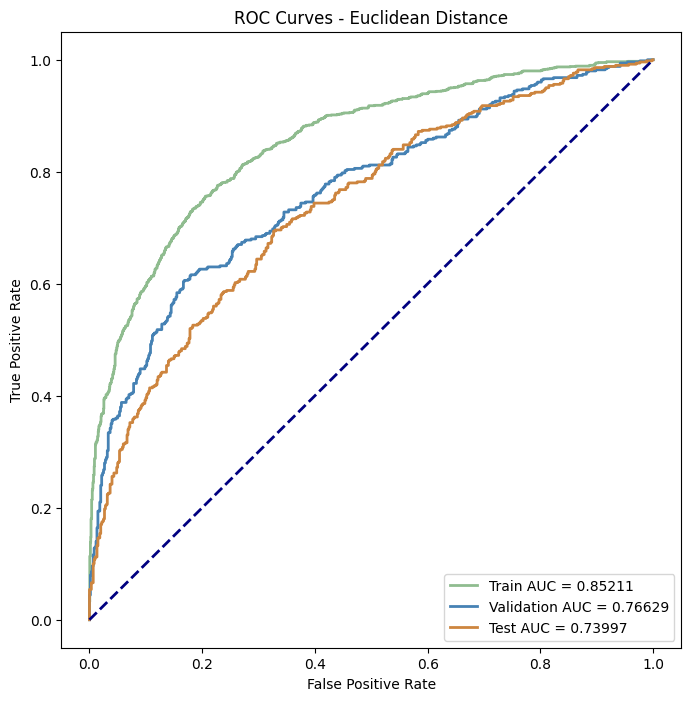

In [28]:
# Flatten the lists of labels
flat_test_labels = [item for sublist in test_euclidean_actual_labels for item in sublist]
flat_train_labels = [item for sublist in train_euclidean_actual_labels for item in sublist]
flat_validation_labels = [item for sublist in validation_euclidean_actual_labels for item in sublist]

# Calculate ROC curve
fpr_test, tpr_test, thresholds_test = roc_curve(flat_test_labels, normalized_test_euclidean_distance, drop_intermediate=False)
roc_auc_test = auc(fpr_test, tpr_test)
fpr_train, tpr_train, thresholds_train = roc_curve(flat_train_labels, normalized_train_euclidean_distance, drop_intermediate=False)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_validation, tpr_validation, thresholds_validation = roc_curve(flat_validation_labels, normalized_validation_euclidean_distance, drop_intermediate=False)
roc_auc_validation = auc(fpr_validation, tpr_validation)

# Plot ROC curve
plt.figure(figsize=(8, 8))

plt.plot(fpr_train, tpr_train, color='darkseagreen', lw=2, label=f'Train AUC = {roc_auc_train:.5f}')
plt.plot(fpr_validation, tpr_validation, color='steelblue', lw=2, label=f'Validation AUC = {roc_auc_validation:.5f}')
plt.plot(fpr_test, tpr_test, color='peru', lw=2, label=f'Test AUC = {roc_auc_test:.5f}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Euclidean Distance')
plt.legend(loc='lower right')
plt.show()

In [29]:
print(tpr_test)

[0.    0.002 0.004 ... 0.998 1.    1.   ]


In [30]:
print(fpr_test)

[0.         0.         0.         ... 0.99833333 0.99833333 1.        ]


In [31]:
def find_tpr_at_fpr(fpr, tpr, target_fpr):
    return np.interp(target_fpr, fpr, tpr)

In [32]:
target_fprs = [0.1, 0.01, 0.001]
tpr_at_target_fpr_train = [find_tpr_at_fpr(fpr_train, tpr_train, fpr) for fpr in target_fprs]
tpr_at_target_fpr_test = [find_tpr_at_fpr(fpr_test, tpr_test, fpr) for fpr in target_fprs]
tpr_at_target_fpr_val = [find_tpr_at_fpr(fpr_validation, tpr_validation, fpr) for fpr in target_fprs]

In [33]:
print("Train")
for tpr, fpr in zip(tpr_at_target_fpr_train, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_train}')

print("Validation")
for tpr, fpr in zip(tpr_at_target_fpr_val, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_validation}')

print("Test")
for tpr, fpr in zip(tpr_at_target_fpr_test, target_fprs):
    print(f'TPR at FPR {fpr:.3f}: {tpr:.3f}')
print(f'             AUC: {roc_auc_test}')


Train
TPR at FPR 0.100: 0.596
TPR at FPR 0.010: 0.288
TPR at FPR 0.001: 0.114
             AUC: 0.8521140873015872
Validation
TPR at FPR 0.100: 0.454
TPR at FPR 0.010: 0.130
TPR at FPR 0.001: 0.044
             AUC: 0.7662866666666668
Test
TPR at FPR 0.100: 0.396
TPR at FPR 0.010: 0.112
TPR at FPR 0.001: 0.054
             AUC: 0.7399733333333334
